

# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue, so we will explore the following questions:

###### Q1: Which are genres have the most and least movies?
###### Q2: Which top 5 directors that have directed the most movies?
###### Q3: What are profit trends from year to year?
###### Q4: What are Top 5 movies based on their popularity?




In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# preview statistics about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# data types of columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# number of rows and columns
df.shape

(10866, 21)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

The dataset will be cleaned by removing null and duplicate values from it.

In [9]:
# Drop rows not needed for analysis
df.drop(['id','budget', 'revenue','overview', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'production_companies',], axis=1, inplace=True)

In [10]:
# View the layout of the dataframe
df.head()

,popularity,profit_loss,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1.254446e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,2.101614e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1.704191e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1.718723e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1.210949e+09,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#Check for Missing values

df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [21]:
# deal with the missing values
df.dropna(axis=0, inplace=True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [15]:
#Check for duplicated values

df.duplicated().sum()



1

In [16]:
# drop duplicates

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [22]:


# save the data after cleaning 
df.to_csv('clean_tmdb_movies.csv', index=False)



<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1: Which are genres have the most and least Movies?


The following code to determine which genres have the most and least movies then we represent it by the column chart.

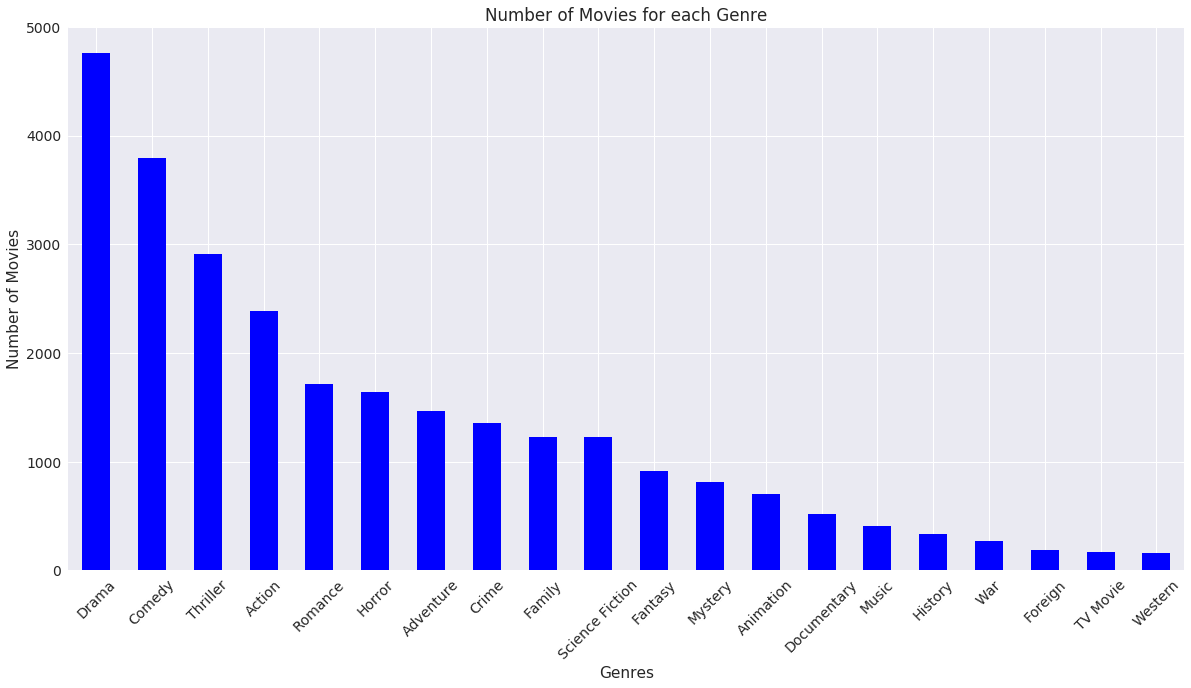

In [17]:

# Generate a bar plot to describe genres that have the most and least movies
film_g = df.genres.str.cat(sep='|')
film_g = pd.Series(film_g.split('|'))
film_genre_counts = film_g.value_counts()
film_genre_counts.plot(figsize=(20,10), kind='bar', color='blue').set(xlabel='Genres', ylabel='Number of Movies');
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Number of Movies for each Genre');



Based on the above chart we can see the Drama has most of movies and Western has least of movies.

### Q2: Which top 5 directors that have directed the most movies?

The following code to determine top 5 of directors that have directed the most movies then we represent it by the column chart:


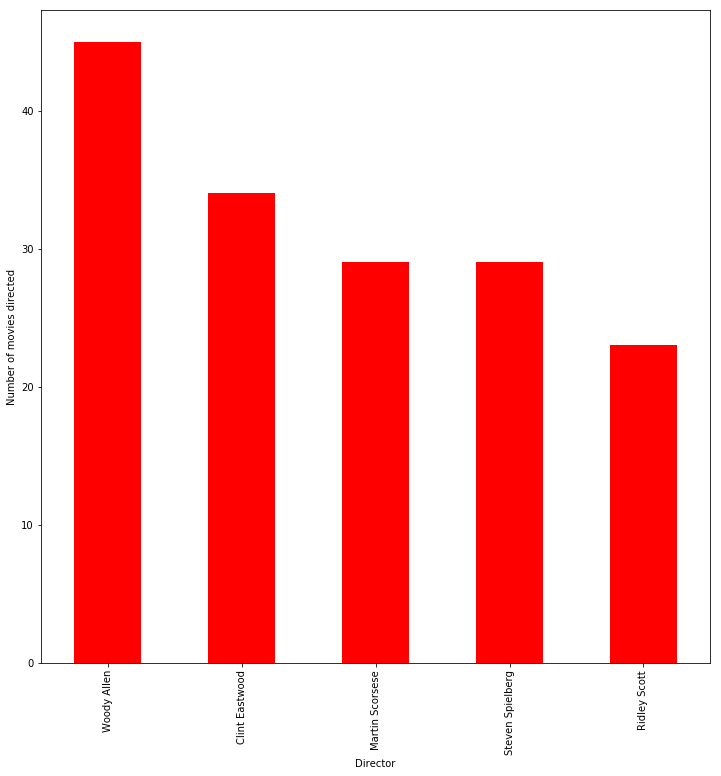

In [5]:
# Generate a bar plot of directors based on number of directed films
top_5_directors = df.groupby('director').size().nlargest(5).reset_index(name='total')
top_5_directors.plot(x='director', y='total', kind='bar', figsize=(12,12), color='Red', legend=None).set(xlabel='Director', ylabel='Number of movies directed');

Based on the above chart we can see the top 5 directors that have directed the most movies.

### Q3: What are profit trends from year to year?

First we need to insert a column for the profit/loss value of each movie:

In [6]:
# Insert a column for the profit/loss value of each movie
df.insert(3, 'profit_loss', df['revenue_adj'] - df['budget_adj'])

The following code to represent data using line chart:

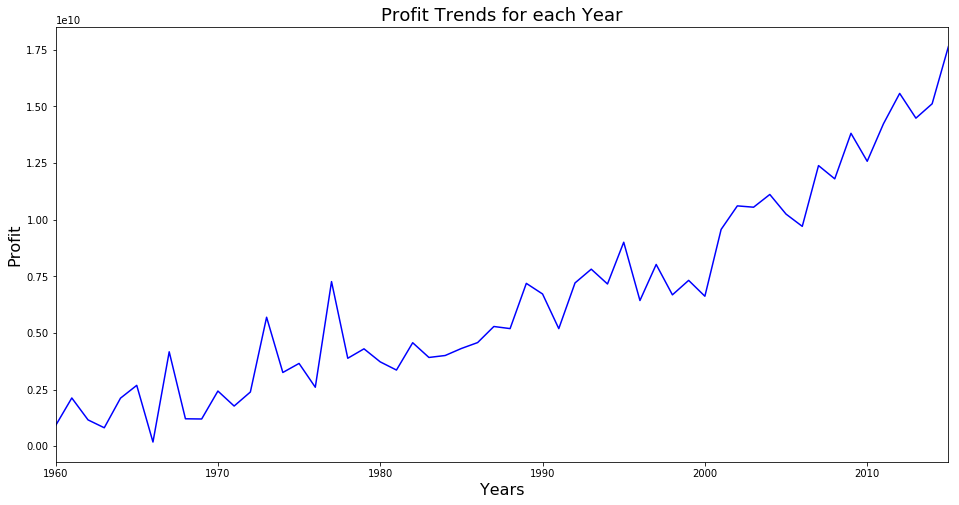

In [7]:
# represent data using line chart
df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = 'b')
plt.title('Profit Trends for each Year', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Profit', fontsize = 16);

Based on the above chart we can see how the profit change from year to year.

### Q4: What are Top 5 movies based on their popularity?

The following code to find top 5 movies based on their popularity:

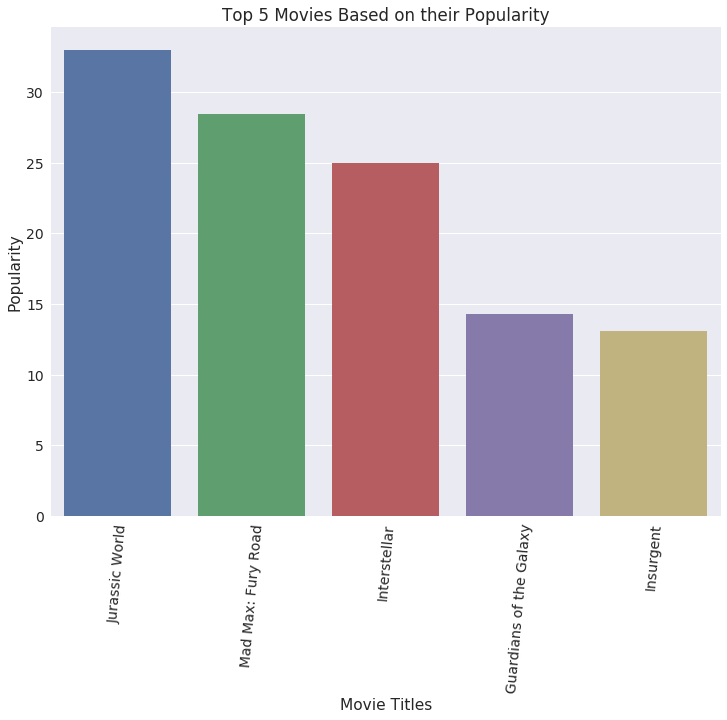

In [5]:


# To Find Top 5 movies based on their popularity
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)

movies_and_popularity = df[['original_title','popularity']]
ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(5).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(5).popularity)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Movie Titles', ylabel='Popularity', title = 'Top 5 Movies Based on their Popularity')
plt.show()

Based on the above chart we can see the top 5 movies that has most popularity.


<a id='conclusions'></a>
## Conclusions

<p>
    <b>Which are genres have the most and least movies? </b></p>
<p>    The Drama genre has most number of movies and Western has west number of movies.</p>
<p>
    <b>
    Which top 5 directors that have directed the most movies?
    </b>
 </p>
<p> The Woody Allen, clint Eastwood, Martin Sorsese, Steven Spielberg and Ridley Scott have the most directed movies.</p>
<p>
    <b>
    What are profit trends from year to year?
    </b>
 </p>
<p>In the last years the profit is increasing significantly.</p>
<p>
    <b>
    What are Top 5 movies based on their popularity?
    </b>
 </p>
<p>The Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent the most popularity movies.</p>

## Limitations


 <p>his analysis does not include movies that don't have an associated runtime which can skew the director, revenue_adj and budget_adj values.</p>
<p> movies that have 0 revenue and/or budget are not included in the analysis and can skew the total number of films that a director has directed.</p>
<p> Analysis is based on a small sample of movie data and actual totals will skew higher if all data is included.</p>



In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0